**Grupo 7**

Alunos: Jorge Luiz Satler Coltro, Thomas Adriaan Topfstedt, Vinicius Afonso Heinen

Trabalho 2 

Disciplina:BLU8002-10754 (20231) - Inteligência Artificial

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
from math import exp
from math import pi

In [2]:
##Mover para cima!
#remover arquivos caso já existam
!rm -rfv Buy_Computer.csv

# baixar o arquivo do GoogleDrive usando o gdown
!gdown https://drive.google.com/uc?id=1UoC9Ch1h01vcCFSa0zm1R3kz8ohdt-JN

Downloading...
From: https://drive.google.com/uc?id=1UoC9Ch1h01vcCFSa0zm1R3kz8ohdt-JN
To: /content/Buy_Computer.csv
100% 575/575 [00:00<00:00, 1.82MB/s]


In [3]:
# Criando o dataset pandas DataFrame
df = pd.read_csv("Buy_Computer.csv")
 
# Create a pandas DataFrame
#df = pd.DataFrame(data, columns=['id', 'age', 'income', 'student', 'credit_rating', 'buy_computer', 'house_value_mi'])

# Remove instances 5 and 12 for testing, and use the rest for training
test_instances = df[df['id'].isin([5, 12])]
df = df[~df['id'].isin([5, 12])]

# print dataframe.
df.index += 1
df

,id,age,income,student,credit_rating,buy_computer,house_value_mi
1,1,youth,high,no,fair,no,1.50
2,2,youth,high,no,excellent,no,1.72
3,3,middle_age,high,no,fair,yes,1.66
4,4,senior,medium,no,fair,yes,1.01
6,6,senior,low,yes,excellent,no,0.70
7,7,middle_age,low,yes,excellent,yes,0.56
8,8,youth,medium,no,fair,no,1.20
9,9,youth,low,yes,fair,yes,0.45
10,10,senior,medium,yes,fair,yes,1.30
11,11,youth,medium,yes,excellent,yes,1.34


In [4]:
# obtendo os totais

# número de exemplos
nrow = len(df.index)
# número de exemplos positivos
nrowYes = sum(df.values[:,3] == 'yes')
# número de exemplos negativos
nrowNo = sum(df.values[:,3] == 'no')

p_ClasseYes = nrowYes/nrow
p_ClasseNo = nrowNo/nrow

print(f"P(Student = Yes) = {p_ClasseYes}")
print(f"P(Student = No) = {p_ClasseNo}")

P(Student = Yes) = 0.5
P(Student = No) = 0.5


In [5]:
#Calculo Probabilidades Student - Age

# P(age=youth|student=Yes)
p_youth_Yes = len(df.loc[(df['age'] == 'youth') & (df['student'] == 'yes')])/nrowYes

# P(age=youth|student=No)
p_youth_No = len(df.loc[(df['age'] == 'youth') & (df['student'] == 'no')])/nrowNo

# P(age=middle_age|student=Yes)
p_middle_Yes = len(df.loc[(df['age'] == 'middle_age') & (df['student'] == 'yes')])/nrowYes

# P(age=middle_age|student=No)
p_middle_No = len(df.loc[(df['age'] == 'middle_age') & (df['student'] == 'no')])/nrowNo

# P(age=senior	|student=Yes)
p_senior_Yes = len(df.loc[(df['age'] == 'senior	') & (df['student'] == 'yes')])/nrowYes

# P(age=senior	|student=No)
p_senior_No = len(df.loc[(df['age'] == 'senior	') & (df['student'] == 'no')])/nrowNo

print(f" P(age=youth|student=Yes) = {p_youth_Yes}")
print(f" P(age=youth|student=No) = {p_youth_No}")
print(f" P(age=middle_age|student=Yes) = {p_middle_Yes}")
print(f" P(age=middle_age|student=No) = {p_middle_No}")
print(f" P(age=senior|student=Yes) = {p_senior_Yes}")
print(f" P(age=senior|student=No) = {p_senior_No}")

 P(age=youth|student=Yes) = 0.3333333333333333
 P(age=youth|student=No) = 0.5
 P(age=middle_age|student=Yes) = 0.3333333333333333
 P(age=middle_age|student=No) = 0.16666666666666666
 P(age=senior|student=Yes) = 0.0
 P(age=senior|student=No) = 0.0


In [6]:
#Calculo Probabilidades Student - income


# P(income=low|student=Yes)
p_low_Yes = len(df.loc[(df['income'] == 'low') & (df['student'] == 'yes')])/nrowYes


# P(income=low|student=No)
p_low_No = len(df.loc[(df['income'] == 'low') & (df['student'] == 'no')])/nrowNo


# P(income=medium|student=Yes)
p_middle_Yes = len(df.loc[(df['income'] == 'medium') & (df['student'] == 'yes')])/nrowYes


# P(income=medium|student=No)
p_middle_No = len(df.loc[(df['income'] == 'medium') & (df['student'] == 'no')])/nrowNo


# P(income=high  |student=Yes)
p_high_Yes = len(df.loc[(df['income'] == 'high ') & (df['student'] == 'yes')])/nrowYes


# P(income=high  |student=No)
p_high_No = len(df.loc[(df['income'] == 'high  ') & (df['student'] == 'no')])/nrowNo


print(f" P(income=low|student=Yes) = {p_low_Yes}")
print(f" P(income=low|student=No) = {p_low_No}")
print(f" P(income=medium|student=Yes) = {p_middle_Yes}")
print(f" P(income=medium|student=No) = {p_middle_No}")
print(f" P(income=high|student=Yes) = {p_high_Yes}")
print(f" P(income=high|student=No) = {p_high_No}")

 P(income=low|student=Yes) = 0.5
 P(income=low|student=No) = 0.0
 P(income=medium|student=Yes) = 0.3333333333333333
 P(income=medium|student=No) = 0.5
 P(income=high|student=Yes) = 0.0
 P(income=high|student=No) = 0.0


In [7]:
#Calculo Probabilidades Student - Credit_rating


# P(credit=fair|student=yes)
p_credit_yes= len(df.loc[(df['credit_rating'] == 'fair') & (df['student'] == 'yes')])/nrowYes


# P(credit=fair|student=No)
p_credit_No = len(df.loc[(df['credit_rating'] == 'fair') & (df['student'] == 'no')])/nrowNo


# P(credit=excellent|student=yes)
p_ncredit_yes = len(df.loc[(df['credit_rating'] == 'excellent') & (df['student'] == 'yes')])/nrowYes


# P(credit=excellent|student=No)
p_ncredit_No = len(df.loc[(df['credit_rating'] == 'excellent') & (df['student'] == 'no')])/nrowNo

#print
print(f"P(credit=yes|student=yes) = {p_credit_yes}")
print(f"P(credit=yes|student=no) = {p_credit_No }")
print(f"P(credit=no|student=yes) = {p_ncredit_yes }")
print(f"P(credit=no|student=no) = {p_ncredit_No}")

P(credit=yes|student=yes) = 0.5
P(credit=yes|student=no) = 0.6666666666666666
P(credit=no|student=yes) = 0.5
P(credit=no|student=no) = 0.3333333333333333


In [8]:
#Calculo Probabilidades Student - Buy_computer

# P(Buy_computer=Yes|DefaultedBorrower=Yes)
p_bcYes_Yes = len(df.loc[(df['buy_computer'] == 'yes') & (df['student'] == 'yes')])/nrowYes

# P(Buy_computer=Yes|DefaultedBorrower=No)
p_bcYes_No = len(df.loc[(df['buy_computer'] == 'yes') & (df['student'] == 'no')])/nrowNo

# P(Buy_computer=No|DefaultedBorrower=Yes)
p_bcNo_Yes = len(df.loc[(df['buy_computer'] == 'no') & (df['student'] == 'yes')])/nrowYes

# P(Buy_computer=No|DefaultedBorrower=No)
p_bcNo_No = len(df.loc[(df['buy_computer'] == 'no') & (df['student'] == 'no')])/nrowNo


# print
print(f"P(Buy_computer=Yes|Student=Yes) = {p_bcYes_Yes}")
print(f"P(Buy_computer=Yes|Student=Yes) = {p_bcYes_No}")
print(f"P(Buy_computer=Yes|Student=Yes) = {p_bcNo_Yes}")
print(f"P(Buy_computer=Yes|Student=Yes) = {p_bcNo_No}")

P(Buy_computer=Yes|Student=Yes) = 0.8333333333333334
P(Buy_computer=Yes|Student=Yes) = 0.3333333333333333
P(Buy_computer=Yes|Student=Yes) = 0.16666666666666666
P(Buy_computer=Yes|Student=Yes) = 0.6666666666666666


In [9]:
# calcula a média de um vetor de valores
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
# calcula o desvio padrão de um vetor de valores
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# calcula a probabilidade de um valor x usando a média e o desvio padrão do atributo obtidos no dataset de teste
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent


In [10]:
# Calculo média, desvio padrão e a probabilidade para um x quando o atributo for númerico (contínuo ou não discreto)

# exemplo 1: probabilidade de um exemplo com valor 1 no atributo house_value_mi pertencer a classe Yes
student_meanYes = mean(df.loc[(df['student'] == 'yes')].values[:,6])
student_stdevYes = stdev(df.loc[(df['student'] == 'yes')].values[:,6])
p_in100_Yes = calculate_probability(1.01, student_meanYes, student_stdevYes)
print("media Yes: " + str(student_meanYes) + " desvio padrão Yes: " + str(student_stdevYes) + " probabilidade Yes = " + str(p_in100_Yes))

# exemplo 2: probabilidade de um exemplo com valor 1 no atributo house_value_mi pertencer a classe No
student_stdevNo = stdev(df.loc[(df['student'] == 'no')].values[:,6])
student_meanNo = mean(df.loc[(df['student'] == 'no')].values[:,6])
p_in100_No = calculate_probability(1.01, student_meanNo, student_stdevNo)
print("media No: " + str(student_meanNo) + " desvio padrão No: " + str(student_stdevNo) + " probabilidade No = " + str(p_in100_No))

media Yes: 1.025 desvio padrão Yes: 0.5344062125387391 probabilidade Yes = 0.7462210395565431
media No: 1.3966666666666665 desvio padrão No: 0.27717623755774345 probabilidade No = 0.5439605448137628


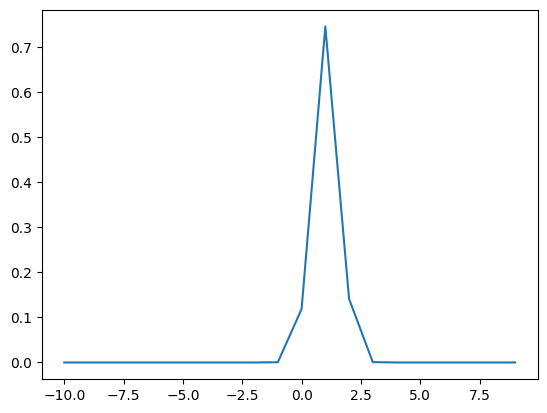

In [11]:
# plotando as gaussiana do atributo Student para Yes
import matplotlib.pyplot as plt
x = [n for n in range(-10,10,1)]
y = [calculate_probability(xi, student_meanYes, student_stdevYes) for xi in x]
plt.plot(x, y)

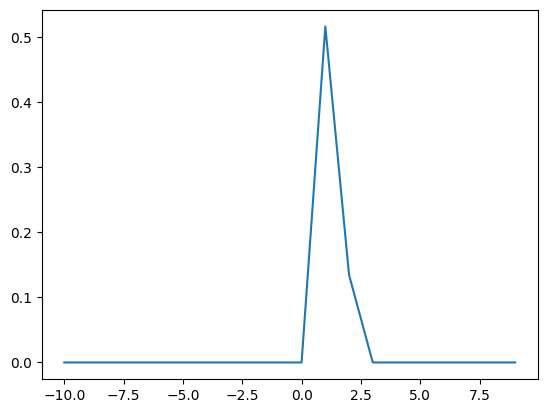

In [12]:
# plotando as gaussiana do atributo Student para No
import matplotlib.pyplot as plt
x = [n for n in range(-10,10,1)]
y = [calculate_probability(xi, student_meanNo, student_stdevNo) for xi in x]
plt.plot(x, y)

In [13]:
#Predição da classe Student para o ID = 5 Resposta deve ser = Yes

p_yes = p_youth_Yes * p_middle_Yes * p_credit_yes * p_bcYes_Yes * calculate_probability(0.5, student_meanYes, student_stdevYes)
print("Probabiliade de X pertencer a classe Yes: " + str(p_yes))
p_no = p_youth_No * p_middle_No * p_credit_No * p_bcYes_No * calculate_probability(0.5, student_meanNo, student_stdevNo)
print("Probabiliade de X pertencer a classe No: " + str(round(p_no,3)))

if p_yes > p_no:
  print("Classe Student é: Yes")

Probabiliade de X pertencer a classe Yes: 0.021331157596204176
Probabiliade de X pertencer a classe No: 0.0
Classe Student é: Yes


In [14]:
#Predição da classe Student para o ID = 12 Resposta deve ser = No

p_yes = p_youth_Yes * p_middle_Yes * p_credit_yes * p_bcYes_Yes * calculate_probability(1.4, student_meanYes, student_stdevYes)
print("Probabiliade de X pertencer a classe Yes: " + str(p_yes))
p_no = p_youth_No * p_middle_No * p_credit_No * p_bcYes_No * calculate_probability(1.4, student_meanNo, student_stdevNo)
print("Probabiliade de X pertencer a classe No: " + str(round(p_no,3)))

if p_yes < p_no:
  print("Classe Student é: No")

Probabiliade de X pertencer a classe Yes: 0.0270184945619622
Probabiliade de X pertencer a classe No: 0.08
Classe Student é: No
